# Computing Assignment 3 - Math 578
## Matthew King-Roskamp
## Student Number: 260976649

In [3]:
# Standard Preamble, importing necessary packages
import numpy as np;
import matplotlib.pyplot as pl;

# Part 1
Implement forward and backward Euler methods for vector valued functions - where the backward Euler code uses Newton's method as a nonlinear solver. 

Here, as each piece of code is standard, we only comment within the code block itself when necessary.

In [4]:
# Forward Euler
# Note imputs will be vector valued in general
def ForwardEuler(x0,iterations,f, h):
    result = np.zeros([x0.shape[0],iterations]);
    xk = x0;
    for k in range(iterations):
        xk = xk + h*f(xk)
        result[:,k] = np.copy(xk);
    return result;

def NewtonIteration(x0,f,fprime,h,solnValue):
    # Implements the newton iteration for finding the root of
    # g(u) = u -hf(u) - w^{n}; the resulting root of backwards euler.
    xk = np.copy(x0);
    n = np.size(x0)
    lastIteration = 100*np.copy(xk);
    currentIt = 0;
    while(np.linalg.norm(xk -lastIteration) > 10.0**(-6)):
        # We iterate until the sequence becomes sufficiently Cauchy.
        # We include a break statement if we do more than 1000 Newton iterations.
        lastIteration = np.copy(xk);
        if(n <=1):
            # for ease of indexing issues, we break the 1-D and n-D cases apart
            # this is for just working on R:
            xk = xk - ((xk - h*f(xk) - solnValue)/( 1-h*fprime(xk)));
            currentIt = currentIt+1;
            if(currentIt > 1000):
                break;
        else:
            # working on R^n, we have to compute the matrix inverse or solve the linear system
            inv = np.linalg.inv(np.diag(np.ones(n))-h*fprime(xk));
            xk = xk -np.matmul(inv,(xk - h*f(xk) - solnValue));
            currentIt = currentIt+1;
            if(currentIt > 1000):
                break;
    return xk,currentIt;

## Backard Euler with Newton Solve
def BackwardEuler(x0,iterations,f,fprime,h):
    result = np.zeros([x0.shape[0],iterations]);
    xk = x0;
    functionEvals = 0;
    for k in range(iterations):
        # initial guess of forward Euler
        xk = xk + h*f(xk)
        # Pass this into Newton
        [xk,currentit] = NewtonIteration(xk,f,fprime,h,np.copy(xk));
        result[:,k] = np.copy(xk);
        functionEvals = functionEvals + currentit;
    return result,functionEvals;
        

 # Part 2: using forwards and backwards Euler
 ## (a), (i)
 Here, we use our implementation of forwards and backwards euler to solve the problem for
 $$ y' = \lambda y.$$
 Here in part $(a)$, $\lambda = -23$, and thus the true solution is $e^{-23}$. Our knowledge of the stability of these method tells us that backwards euler should be much preferable in this case, and forwards euler will not be as accurate. To examine this, we consider various stepsizes $h$, and compare the computed solutio at $t=2$ for all methods. This should serve to display the relationship between $h$ and the error in all cases.

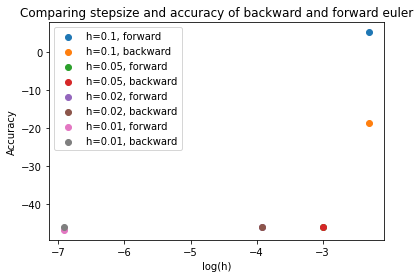

In [5]:
def f(x):
    return -23*x;

def fprime(x):
    return -23;

def solution(x):
    return np.exp(-23*x);


h = 0.1
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(np.log(h),np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

h = 0.05
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(np.log(h),np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

h = 0.02
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(np.log(h),np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

h = 0.001
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(np.log(h),np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

pl.legend(['h=0.1, forward','h=0.1, backward','h=0.05, forward','h=0.05, backward','h=0.02, forward','h=0.02, backward','h=0.01, forward','h=0.01, backward']);
pl.xlabel('log(h)');
pl.ylabel('Accuracy');
pl.title('Comparing stepsize and accuracy of backward and forward euler');

As we expect, a very small stepsize results in very high accuracy. In this picture, it appears that stepsize $\approx 10^{-2}$ results in error on the order of $10^-40$, remarkably accurate. But, we already see that takeing larger  stepsize $\approx 2 \times 10^{-2}$ result in comparable accuracy, with much less computation: which we will examine more directly in part (b)

## (a),(ii)

We now repeat the experiment for $\lambda =1$. As our true solution $e^{x}$ is growing, and backwards euler is only stable in the left half plane, we expect here forward euler to outperform. And; this is precisely what we observe.

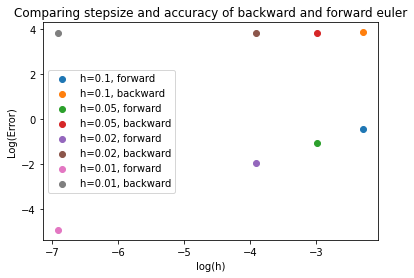

In [7]:

def f(x):
    return x;

def fprime(x):
    return 1;

def solution(x):
    return np.exp(x);

h = 0.1
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(np.log(h),np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

h = 0.05
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(np.log(h),np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

h = 0.02
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(np.log(h),np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

h = 0.001
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(np.log(h),np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

pl.legend(['h=0.1, forward','h=0.1, backward','h=0.05, forward','h=0.05, backward','h=0.02, forward','h=0.02, backward','h=0.01, forward','h=0.01, backward']);
pl.xlabel('log(h)');
pl.ylabel('Log(Error)');
pl.title('Comparing stepsize and accuracy of backward and forward euler');



On average, forward euler is 8 order of magnitude more accurate!

## (a), (iii)

Finally, we examine a vector system
$$ y' = Ay ,\qquad A = \text{diag}(-1,-100)$$.
This system is diagonal and seperable, and do we know $y_{1} = e^{-1}, y_{2} = e^{-100}$. Thus we expect backward euler to be the better performing method, which is what we again observe. However, in the newton solve for this method, we need to multiply by the invere matrix
$$ (I - A)^{-1}x_{k}$$
which can become numerically unstable for some choices of $h$. Notably if $x_{k}$ is close to an eigenvalue of this system, this is close to zero. This can be avoided by taking suitably large stepsize

[  -1 -100]


<ipython-input-8-3a0abd4154cb>:3: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A,x);
<ipython-input-4-6f81f071b589>:32: RuntimeWarning: invalid value encountered in matmul
  xk = xk -np.matmul(inv,(xk - h*f(xk) - solnValue));
<ipython-input-8-3a0abd4154cb>:3: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A,x);


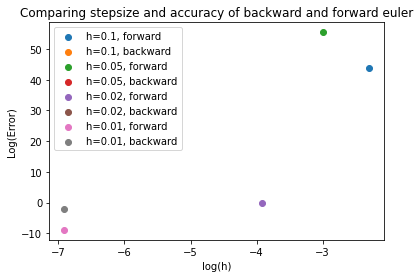

In [8]:

A = np.diag([-1,-100]);
def f(x):
    return np.matmul(A,x);

print(f([1,1]))
def fprime(x):
    return np.diag([-1,-1/100]);


def solution(x):
    return [np.exp(-x), np.exp(-100*x)];

h = 0.1
iteration = int(2/h);
x = np.array([1,1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(np.log(h),np.log(np.linalg.norm(resultForward[:,iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.linalg.norm(resultBackward[0][:,iteration-1]-solution(2))));

h = 0.05
iteration = int(2/h);
x = np.array([1,1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(np.log(h),np.log(np.linalg.norm(resultForward[:,iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.linalg.norm(resultBackward[0][:,iteration-1]-solution(2))));

h = 0.02
iteration = int(2/h);
x = np.array([1,1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(np.log(h),np.log(np.linalg.norm(resultForward[:,iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.linalg.norm(resultBackward[0][:,iteration-1]-solution(2))));

h = 0.001
iteration = int(2/h);
x = np.array([1,1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(np.log(h),np.log(np.linalg.norm(resultForward[:,iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.linalg.norm(resultBackward[0][:,iteration-1]-solution(2))));

pl.legend(['h=0.1, forward','h=0.1, backward','h=0.05, forward','h=0.05, backward','h=0.02, forward','h=0.02, backward','h=0.01, forward','h=0.01, backward']);
pl.xlabel('log(h)');
pl.ylabel('Log(Error)');
pl.title('Comparing stepsize and accuracy of backward and forward euler');


As expected we noted before, backwards euler sufferes from convergence issues, and both methods are accurate for small enough stepsize.
## Part (b)
Now, we compare this more fairly, using function evaluations. We repeat the experiments of part (a), however on the horizontal axis we now plot the number of function evaluations needed to compute the solution at the endpoint. As backward euler may require many function evaluations per newton solve, this will generally lower its desirability. For brevity, we comment on the results for part (i)-(iii) at the end of part (b)

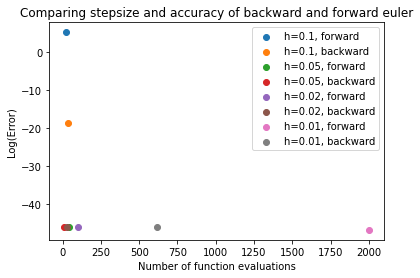

In [9]:
def f(x):
    return -23*x;

def fprime(x):
    return -23;

def solution(x):
    return np.exp(-23*x);


h = 0.1
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(iteration,np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(resultBackward[1],np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

h = 0.05
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(iteration,np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(resultBackward[1],np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

h = 0.02
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(iteration,np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(resultBackward[1],np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

h = 0.001
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(iteration,np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(resultBackward[1],np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

pl.legend(['h=0.1, forward','h=0.1, backward','h=0.05, forward','h=0.05, backward','h=0.02, forward','h=0.02, backward','h=0.01, forward','h=0.01, backward']);
pl.xlabel('Number of function evaluations');
pl.ylabel('Log(Error)');
pl.title('Comparing stepsize and accuracy of backward and forward euler');

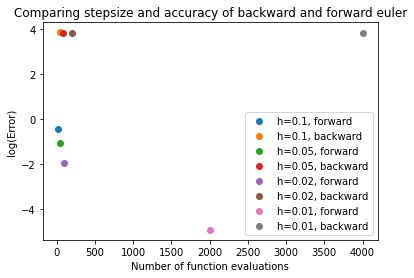

In [10]:

def f(x):
    return x;

def fprime(x):
    return 1;

def solution(x):
    return np.exp(x);


h = 0.1
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(iteration,np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(resultBackward[1],np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

h = 0.05
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(iteration,np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(resultBackward[1],np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

h = 0.02
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(iteration,np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(resultBackward[1],np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

h = 0.001
iteration = int(2/h);
x = np.array([1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(iteration,np.log(np.abs(resultForward[0][iteration-1]-solution(2))));
pl.scatter(resultBackward[1],np.log(np.abs(resultBackward[0][0][iteration-1]-solution(2))));

pl.legend(['h=0.1, forward','h=0.1, backward','h=0.05, forward','h=0.05, backward','h=0.02, forward','h=0.02, backward','h=0.01, forward','h=0.01, backward']);
pl.xlabel('Number of function evaluations');
pl.ylabel('log(Error)');
pl.title('Comparing stepsize and accuracy of backward and forward euler');

[  -1 -100]


<ipython-input-11-ee6984ea6348>:3: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A,x);
<ipython-input-4-6f81f071b589>:32: RuntimeWarning: invalid value encountered in matmul
  xk = xk -np.matmul(inv,(xk - h*f(xk) - solnValue));
<ipython-input-11-ee6984ea6348>:3: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A,x);


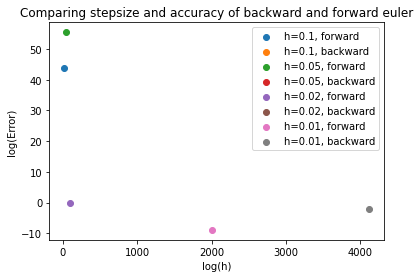

In [11]:

A = np.diag([-1,-100]);
def f(x):
    return np.matmul(A,x);

print(f([1,1]))
def fprime(x):
    return np.diag([-1,-1/100]);


def solution(x):
    return [np.exp(-x), np.exp(-100*x)];

h = 0.1
iteration = int(2/h);
x = np.array([1,1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(iteration,np.log(np.linalg.norm(resultForward[:,iteration-1]-solution(2))));
pl.scatter(resultBackward[1],np.log(np.linalg.norm(resultBackward[0][:,iteration-1]-solution(2))));

h = 0.05
iteration = int(2/h);
x = np.array([1,1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(iteration,np.log(np.linalg.norm(resultForward[:,iteration-1]-solution(2))));
pl.scatter(resultBackward[1],np.log(np.linalg.norm(resultBackward[0][:,iteration-1]-solution(2))));

h = 0.02
iteration = int(2/h);
x = np.array([1,1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(iteration,np.log(np.linalg.norm(resultForward[:,iteration-1]-solution(2))));
pl.scatter(resultBackward[1],np.log(np.linalg.norm(resultBackward[0][:,iteration-1]-solution(2))));

h = 0.001
iteration = int(2/h);
x = np.array([1,1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.scatter(iteration,np.log(np.linalg.norm(resultForward[:,iteration-1]-solution(2))));
pl.scatter(resultBackward[1],np.log(np.linalg.norm(resultBackward[0][:,iteration-1]-solution(2))));

pl.legend(['h=0.1, forward','h=0.1, backward','h=0.05, forward','h=0.05, backward','h=0.02, forward','h=0.02, backward','h=0.01, forward','h=0.01, backward']);
pl.xlabel('log(h)');
pl.ylabel('log(Error)');
pl.title('Comparing stepsize and accuracy of backward and forward euler');

To summarize part (b): for large $h$, there is generally no difference between forwards and backwards euler. For very small $h$, the number of function evaluations required for backward euler make it an extremely poot choice. However, at moderate values of $h$ is where each method shines (for the correct problem). For example, for stepsize on he order of $0.05$ in the part $(a)$, backwards euler (the stable method in this regime) reaches machine epsilon accuracy. Similarly in part $(b)$, forward euler is four order of magnitude more accurate for a fraction of the function evaluations.

## (c)

Now, we plot the solutions for fixed stepsize $h$ for each method. Let us begin with part (i), and compare foward and backward euler to the true solution:


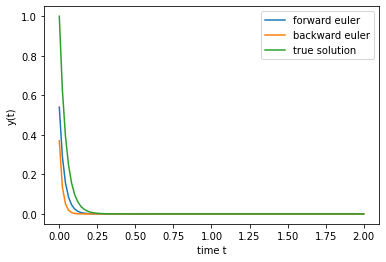

In [12]:

def f(x):
    return -23*x;

def fprime(x):
    return -23;

def solution(x):
    return np.exp(-23*x);

h = 0.02
iteration = int(2/h);
tvals = np.linspace(0,2, iteration);
x = np.array([1,1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.plot(tvals,resultForward[0]);
pl.plot(tvals,resultBackward[0][0]);
pl.plot(tvals,solution(tvals));
pl.legend(['forward euler','backward euler','true solution']);
pl.xlabel('time t');
pl.ylabel('y(t)');

For suitably small stepsize, both methods perform rather well. However, for stepsize too large, the instability of forward euler in this regime becomes clear:

<ipython-input-12-3580d66b787e>:2: RuntimeWarning: overflow encountered in multiply
  return -23*x;
<ipython-input-4-6f81f071b589>:32: RuntimeWarning: invalid value encountered in subtract
  xk = xk -np.matmul(inv,(xk - h*f(xk) - solnValue));


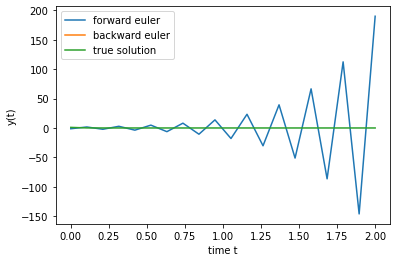

In [13]:
pl.figure()
h = 0.1
iteration = int(2/h);
tvals = np.linspace(0,2, iteration);
x = np.array([1,1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.plot(tvals,resultForward[0]);
pl.plot(tvals,resultBackward[0][0]);
pl.plot(tvals,solution(tvals));
pl.legend(['forward euler','backward euler','true solution']);
pl.xlabel('time t');
pl.ylabel('y(t)');

Now we do the same comparison for part (ii). As expected, forward euler is a much better method to find the true solution, with backward euler being inaacurate in this exponential increase regime

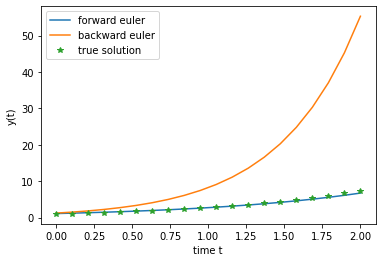

In [14]:
def f(x):
    return x;

def fprime(x):
    return 1;

def solution(x):
    return np.exp(x);

h = 0.1
iteration = int(2/h);
tvals = np.linspace(0,2, iteration);
x = np.array([1,1]);
resultForward = ForwardEuler(x,iteration,f,h)
resultBackward = BackwardEuler(x,iteration,f,fprime,h)
pl.plot(tvals,resultForward[0]);
pl.plot(tvals,resultBackward[0][0]);
pl.plot(tvals,solution(tvals),'*');
pl.legend(['forward euler','backward euler','true solution']);
pl.xlabel('time t');
pl.ylabel('y(t)');


# Part 3 - RK methods
Implement Runge's Second order method, and the four stage method (RK4). As these are standard, we simply develop them without much commentary:

In [15]:
def RKsecondOrder(x0,iterations,f,h):
    xk = np.copy(x0);
    result = np.zeros([x0.shape[0],iterations]);
    for k in range(iterations):
        c1 = f(xk + 0.5*h*f(xk)) ;
        xk = xk + h*c1
        result[:,k] = np.copy(xk);
    return result
    
def RKfourthOrder(x0,iterations,f,h):
    xk = np.copy(x0);
    result = np.zeros([x0.shape[0],iterations]);
    for k in range(iteration):
        c0 = f(xk);
        c1 = f(xk +0.5*h*f(c0));
        c2 = f(xk + 0.5*h*f(c1));
        c3 = f(xk + h*f(c2));
        xk = xk + h*(1/6)*(xk +2*c1+2*c2+c3);
        result[:,k] = np.copy(xk);
    return result

Now, we repeat the experiments of part 2 using these new methods. To avoid repetition, we do not restate the problems at hand. Generally, we are interested in one exponentially growing ODE solution, and one exponentially decaying. As the stability region for the fourth order RK method encompasses the staility region for RK2 in the left half plane, we should expect outperformance in the exponentially decaying regime. However, as neither region contains the right half plane, any accuracy from RK2 or RK4 is only to be seen for extremely small (perhaps prohibitively small h)

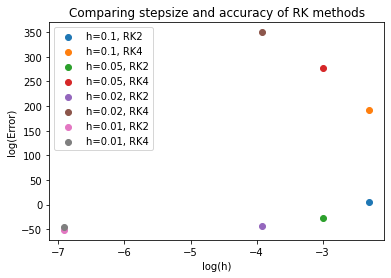

In [16]:
def f(x):
    return -23*x;

def solution(x):
    return np.exp(-23*x);


h = 0.1
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(np.log(h),np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(RK4[0][iteration-1]-solution(2))));

h = 0.05
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(np.log(h),np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(RK4[0][iteration-1]-solution(2))));

h = 0.02
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(np.log(h),np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(RK4[0][iteration-1]-solution(2))));

h = 0.001
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(np.log(h),np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(RK4[0][iteration-1]-solution(2))));

pl.legend(['h=0.1, RK2','h=0.1, RK4','h=0.05, RK2','h=0.05, RK4','h=0.02, RK2','h=0.02, RK4','h=0.01, RK2','h=0.01, RK4']);
pl.xlabel('log(h)');
pl.ylabel('log(Error)');
pl.title('Comparing stepsize and accuracy of RK methods');

Here as expected the performance of both methods is not particularily good. If we make $h$ small enough, then we see that RK4 outperforms RK2 as expected. The next experiment on $e^{-x}$ will serve as a more direct observation of fourth and second order convergence. 

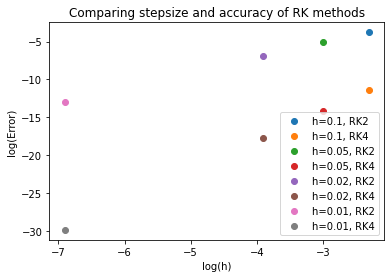

In [17]:
def f(x):
    return x;

def solution(x):
    return np.exp(x);


h = 0.1
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(np.log(h),np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(RK4[0][iteration-1]-solution(2))));

h = 0.05
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(np.log(h),np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(RK4[0][iteration-1]-solution(2))));

h = 0.02
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(np.log(h),np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(RK4[0][iteration-1]-solution(2))));

h = 0.001
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(np.log(h),np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(np.log(h),np.log(np.abs(RK4[0][iteration-1]-solution(2))));

pl.legend(['h=0.1, RK2','h=0.1, RK4','h=0.05, RK2','h=0.05, RK4','h=0.02, RK2','h=0.02, RK4','h=0.01, RK2','h=0.01, RK4']);
pl.xlabel('log(h)');
pl.ylabel('log(Error)');
pl.title('Comparing stepsize and accuracy of RK methods');

Here, we can more directly see the fourth order and second order convergence, as exhibited by straight lines of slope 2,4 on our loglog plot. In this regime, RK4 unilaterally outperforms RK2.

As before, we now do a fairer comparison, using the total number of function evaluations. directly examining RK2 we see this requires two function evaluations per iteration, whereas RK4 requires six. Thus, we can simply count the number of iterations times the appropriate constant.

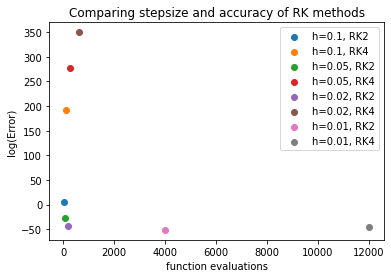

In [18]:
def f(x):
    return -23*x;

def solution(x):
    return np.exp(-23*x);


h = 0.1
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(2*iteration,np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(6*iteration,np.log(np.abs(RK4[0][iteration-1]-solution(2))));

h = 0.05
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(2*iteration,np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(6*iteration,np.log(np.abs(RK4[0][iteration-1]-solution(2))));

h = 0.02
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(2*iteration,np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(6*iteration,np.log(np.abs(RK4[0][iteration-1]-solution(2))));

h = 0.001
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(2*iteration,np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(6*iteration,np.log(np.abs(RK4[0][iteration-1]-solution(2))));

pl.legend(['h=0.1, RK2','h=0.1, RK4','h=0.05, RK2','h=0.05, RK4','h=0.02, RK2','h=0.02, RK4','h=0.01, RK2','h=0.01, RK4']);
pl.xlabel('function evaluations');
pl.ylabel('log(Error)');
pl.title('Comparing stepsize and accuracy of RK methods');

Here, we see that RK2 requiring much less function evaluations may be useful if accuracy is not require to high precision, expecialy in the moderate $h$ case. Performing the same experiment for the exponential reveals similar behaivor:

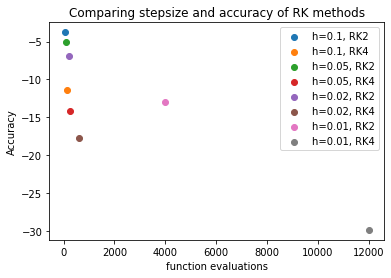

In [19]:
def f(x):
    return x;

def solution(x):
    return np.exp(x);


h = 0.1
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(2*iteration,np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(6*iteration,np.log(np.abs(RK4[0][iteration-1]-solution(2))));

h = 0.05
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(2*iteration,np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(6*iteration,np.log(np.abs(RK4[0][iteration-1]-solution(2))));

h = 0.02
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(2*iteration,np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(6*iteration,np.log(np.abs(RK4[0][iteration-1]-solution(2))));

h = 0.001
iteration = int(2/h);
x = np.array([1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.scatter(2*iteration,np.log(np.abs(RK2[0][iteration-1]-solution(2))));
pl.scatter(6*iteration,np.log(np.abs(RK4[0][iteration-1]-solution(2))));

pl.legend(['h=0.1, RK2','h=0.1, RK4','h=0.05, RK2','h=0.05, RK4','h=0.02, RK2','h=0.02, RK4','h=0.01, RK2','h=0.01, RK4']);
pl.xlabel('function evaluations');
pl.ylabel('Accuracy');
pl.title('Comparing stepsize and accuracy of RK methods');

Finally, we plot the solution in $t$ for fixed h. These experiments are perhaps not as interesting as the case for forwards and backwards Euler, as for appropriate stepsize both these methods can be simultaneously accurate: 

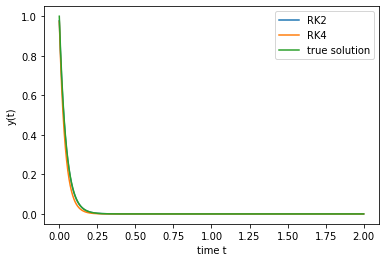

In [20]:
def f(x):
    return -23*x;

def solution(x):
    return np.exp(-23*x);

h = 0.001
iteration = int(2/h);
tvals = np.linspace(0,2, iteration);
x = np.array([1,1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.plot(tvals,RK2[0]);
pl.plot(tvals,RK4[0]);
pl.plot(tvals,solution(tvals));
pl.legend(['RK2','RK4','true solution']);
pl.xlabel('time t');
pl.ylabel('y(t)');

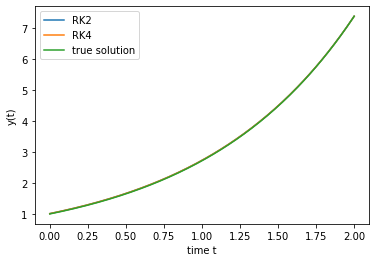

In [21]:
def f(x):
    return x;

def solution(x):
    return np.exp(x);

h = 0.01
iteration = int(2/h);
tvals = np.linspace(0,2, iteration);
x = np.array([1,1]);
RK2 = RKsecondOrder(x,iteration,f,h)
RK4 = RKfourthOrder(x,iteration,f,h)
pl.plot(tvals,RK2[0]);
pl.plot(tvals,RK4[0]);
pl.plot(tvals,solution(tvals));
pl.legend(['RK2','RK4','true solution']);
pl.xlabel('time t');
pl.ylabel('y(t)');

# Part 4 - Planetary Motion

In [22]:
# Data for outer solar system simulation
# Units: mass in solar mass, time in Earth day, length in astronomical unit
# Source: J.A.Barth. Ahnerts Kalender fur Sternfreunde 1994. Verlag
    
g=2.95912208286e-4;         # the gravitational constant

m=[0]*6                 # masses
m[0]=1.00000597682         # Sun + inner planets
m[1]=9.54786104043e-4      # Jupiter
m[2]=2.85583733151e-4      # Saturn
m[3]=4.37273164546e-5      # Uranus
m[4]=5.17759138449e-5      # Neptune
m[5]=7.692307692307693e-9  # Pluto

x=[0]*36;               

# Initial positions at 1994-09-05, UTC0:00
x[0]=0                    # Sun
x[1]=0
x[2]=0

x[3]=-3.5023653          # Jupiter
x[4]=-3.8169847
x[5]=-1.5507963

x[6]= 9.0755314          # Saturn
x[7]=-3.0458353
x[8]=-1.6483708

x[9]=  8.3101420          # Uranus
x[10]=-16.2901086
x[11]= -7.2521278

x[12]= 11.4707666          # Neptune
x[13]=-25.7294829
x[14]=-10.8169456

x[15]=-15.5387357          # Pluto
x[16]=-25.2225594
x[17]= -3.1902382

# Initial velocities at 1994-09-05, UTC0:00
x[18]=0                    # Sun
x[19]=0
x[20]=0

x[21]= 0.00565429          # Jupiter
x[22]=-0.00412490
x[23]=-0.00190589

x[24]= 0.00168318          # Saturn
x[25]= 0.00483525
x[26]= 0.00192462

x[27]= 0.00354178          # Uranus
x[28]= 0.00137102
x[29]= 0.00055029

x[30]= 0.00288930          # Neptune
x[31]= 0.00114527
x[32]= 0.00039677

x[33]= 0.00276725          # Pluto
x[34]=-0.00170702
x[35]=-0.00136504

For convenience, we reshape this into 6 planets:

In [319]:
q = np.transpose(np.reshape(x[0:18],[6,3]));
p =m*np.transpose(np.reshape(x[18:36],[6,3]));

Unfortunately, due to time mismanagement, I was unable to finish this question to a high enough standard to be handed in. Thus, rather than presenting code that does not run correctly, I leave this section blank.